# Análisis Exploratorio de Datos German Credit Risk

In [5]:
import psycopg2
import pandas as pd 
import kaleido
from sqlalchemy import create_engine
import numpy as np

In [6]:
connection =  psycopg2.connect(database="pfinal_db", user="pfinal", password="password", host="127.0.0.1", port="5432")
cursor = connection.cursor()

Con el fragmento de código relacionado a continuación se crea tabla `german_data_risk`

In [7]:
cursor.execute('''DROP TABLE IF EXISTS german_data_risk''')
cursor.execute('''CREATE TABLE german_data_risk(
    Status_of_existing_checking_account  VARCHAR(3),
    Duration_in_month INT,
    Credit_history VARCHAR(3),
    Purpose VARCHAR(3), 
    Credit_amount INT, 
    Savings_account_bonds VARCHAR(3), 
    Present_employment_since VARCHAR(3), 
    Installment_rate_in_percentage_of_disposable_income INT, 
    Personal_statu_and_sex VARCHAR(4), 
    Other_debtors_guarantors VARCHAR(4), 
    Present_residence_since INT, 
    Property VARCHAR(4),
    Age_in_years INT, 
    Other_installment_plans VARCHAR(4), 
    Housing VARCHAR(4),
    Number_of_existing_credits_at_this_bank INT, 
    Job VARCHAR(4), 
    Number_of_people_being_liable_to_provide_maintenance_for INT, 
    Telephone VARCHAR(4), 
    foreign_worker VARCHAR(4),
    Class VARCHAR(1));''')
connection.commit()

In [8]:
df = pd.read_csv("C:/Users/kathy/Desktop/Visualizacion_cientifica/P_final/datos/german_credit_risk.csv", sep=';')
df['Class'] = df['Class'].astype(str)
df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_statu_ and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_ people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Con el siguiente fragmento de código creo la conexión usando la librería `sqlalchemy` para cargar en `PostgreSQL` el archivo `CSV` que contiene la información y/o datos de `GERMAN CREDIT RISK`.

In [9]:
db_params = {
    'host': 'localhost',
    'database': 'pfinal_db',
    'user': 'pfinal',
    'password': 'password'
}
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}')
df.to_sql('german_data_risk', engine, if_exists = 'replace', index=False, method='multi')
connection.commit()

### Descripción de los datos German Credit Risk. 

A continuación, se describe cada una las variables de la tabla `german_data_risk`.


* Variable 1: (cualitativa) Estado de cuentas de cheque existentes  

    |Código|Descripción | 
    |:----|:------------| 
    |A11  |Más de 0 DM  |
    |A12  |Entre 0 y 200 DM|
    |A13  |Más de 200 DM   |
    |A14  |No tiene cuenta de cheque|        
<!---->
* Variable 2: (numérica) Duración en meses.
 
* Variable 3: (cualitativa) Historia crediticia

    |Código|Descripción | 
    |:----|:------------| 
    |A30  |No se han tomado créditos / Todos los créditos reembolsados debidamente |
    |A31  |Todos los créditos en este banco reembolsados debidamente|
    |A32  |Créditos existentes reembolsados debidamente hasta ahora|
    |A33  |Retraso en el pago en el pasado|
    |A33  |Cuenta crítica / Otros créditos existentes (no en este banco)|
<!---->

* Variable 4: (cualitativa) Propósito

    |Código|Descripción | 
    |:----|:------------| 
    |A40  |Carro (nuevo) |
    |A41  |Carro (usado)|
    |A42  |Equipamiento / Amoblado|
    |A43  |Radio / Televisión|
    |A44  |Usos domésticos|
    |A45  |Reparaciones|
    |A46  |Educación|
    |A47  |Vacaciones|
    |A48  |Reciclaje|
    |A49  |Negocios|
    |A410 |Otros|
<!---->
* Variable 5: (numérica) Monto de crédito.  

* Variable 6: (cualitativa) Cuentas de ahorros / Bonos

    |Código|Descripción | 
    |:----|:------------| 
    |A61  |Menos de 100 DM|
    |A62  |Entre 100 y 500 DM|
    |A63  |Entre 500 y 1000 DM|
    |A64  |Más de 1000 DM|
    |A65  |Desconocido / No tiene cuenta de ahorros|
<!---->

* Variable 7: (cualitativa) Actualmente empleado desde

    |Código|Descripción | 
    |:----|:------------| 
    |A71  |Desempleado|
    |A72  |Menos de 1 año|
    |A73  |Entre 1 y 4 años|
    |A74  |Entre 4 y 7 años|
    |A75  |Más de 7 años|
<!---->
 
* Variable 8: (numérica) Tasa de pago a plazos en porcentaje del ingreso disponible.

* Variable 9: (cualitativa) Estado civil y género

    |Código|Descripción | 
    |:----|:------------| 
    |A91  |Masculino – Divorciado o separado|
    |A92  |Femenino – Divorciada, separada o casada|
    |A93  |Masculino – Soltero|
    |A94  |Masculino – Casado / viudo|
    |A95  |Femenino – Soltera|
<!---->
 
* Variable 10: (cualitativa) Otros deudores / garantes

    |Código|Descripción | 
    |:----|:------------| 
    |A101  |Ninguno|
    |A102  |Co solicitante|
    |A103  |Garante|

<!---->
* Variable 11: (numérica) Residencia actual desde.
 
* Variable 12: (cualitativa) Propiedad
 
    |Código|Descripción | 
    |:----|:------------| 
    |A121  |Bienes raíces|
    |A122  |Si no A121: Acuerdo de ahorro de sociedad de construcción / Seguro de vida|
    |A123  |Si no 121/A122: Carro u otro (no incluido en variable 6)|
    |A124  |Desconocido / Sin propiedad|
<!---->

* Variable 13: (numérica) Edad en años.
 
* Variable 14: (cualitativa) Otros planes de pago

    |Código|Descripción | 
    |:----|:------------| 
    |A141  |Banco|
    |A142  |Tiendas|
    |A143  |Ninguno|
<!---->
  
* Variable 15: (cualitativa) Alojamiento

    |Código|Descripción | 
    |:----|:------------| 
    |A151  |Rentado|
    |A152  |Propio|
    |A153  |Gratis|
<!---->

* Variable 16: (numérica) Número de créditos existentes con este banco

* Variable 17: (cualitativa) Trabajo

    |Código|Descripción | 
    |:----|:------------| 
    |A171  |Desempleado / No calificado y no residente|
    |A172  |No calificado y residente|
    |A173  |Empleado calificado / Oficial|
    |A174  |Gestión/ Autónomo / Empleado / Funcionario altamente calificado|
<!---->

* Variable 18: (numérica) Número de personas responsables de proporcionar mantenimiento.
 
* Variable 19: (cualitativa) Teléfono
    |Código|Descripción | 
    |:----|:------------| 
    |A191  |Ninguno|
    |A192  |Si, registrado bajo el nombre del usuario|
<!----> 

* Variable 20: (cualitativa) Trabajador extranjero

    |Código|Descripción | 
    |:----|:------------| 
    |A201  |Si|
    |A202  |No|
<!----> 

* Matriz de costo:
 
    Este conjunto de datos requiere el uso de una matriz de costo, como se muestra a continuación:

    (1 = Bueno, 2 = Malo)  

    | | 1 | 2 |
    |:--|:--|:--|
    |1  |0  | 1 |
    |2  |5  |0  | 


 
Las filas representan la clasificación real y las columnas la clasificación predicha. Es peor clasificar a un cliente como bueno cuando es malo (5), que clasificar a un cliente como malo cuando es bueno (1).

A continuación, presentamos la descripción general del conjunto de datos `german_data_risk`. 

In [10]:
print("Tipo de datos:")
print(df.dtypes)

total_registros = df.shape[0]

Tipo de datos:
Status_of_existing_checking_account                          object
Duration_in_month                                             int64
Credit_history                                               object
Purpose                                                      object
Credit_amount                                                 int64
Savings_account_bonds                                        object
Present_employment_since                                     object
Installment_rate_in_percentage_of_disposable_income           int64
Personal_statu_ and_sex                                      object
Other_debtors_guarantors                                     object
 Present_residence_since                                      int64
Property                                                     object
Age_in_years                                                  int64
Other_installment_plans                                      object
Housing                          

In [11]:
cursor.execute('SELECT count(1) FROM german_data_risk;')
record = cursor.fetchone()
print(record)

(1000,)


Hemos observado que nuestro conjunto de datos almacenado en `pfinal_db` consta de `21` variables (columnas) que tienen tipos de datos `float64` y `object`. El tipo de dato `float64` incluye valores numéricos con decimales, mientras que el tipo `object` abarca variables que contienen información textual o mixta (texto y números) en un formato no numérico (datos categóricos). En total, tenemos 1000 registros en nuestro conjunto de datos. 

De igual forma se observan espacios entre los nombres de nuestras variables, por tal razon procedemos a reenombrarlas con el siguiente fragmento de código: 

In [12]:
df_r = df.rename({'Status_of_existing_checking_account': 'estado_cuentas_exis', 
               'Duration_in_month': 'mes', 
               'Credit_history': 'h_crediticia', 
               'Purpose': 'proposito', 
               'Credit_amount': 'monto', 
               'Savings_account_bonds': 'c_ahorro_bono', 
               'Present_employment_since': 'empleado_desde',
               'Installment_rate_in_percentage_of_disposable_income': 'tasa_pago',
               'Personal_statu_ and_sex': 'ecivil_genero',
               'Other_debtors_guarantors': 'codeudores',
               ' Present_residence_since': 'residencia_desde',
               'Property': 'propiedades',
               'Age_in_years': 'edad',
               'Other_installment_plans': 'otros_pagos',
               'Housing': 'tipo_vivienda',
               'Number_of_existing_credits_at_this_bank': 'creditos_activos',
               'Job': 'trabajo',
               'Number_of_ people_being_liable_to_provide_maintenance_for': 'personas_a_cargo',
               'Telephone': 'tiene_telefono',
               'foreign_worker': 'extranjero',
               'Class': 'clasificacion',}, axis=1)
df_r.head()

,estado_cuentas_exis,mes,h_crediticia,proposito,monto,c_ahorro_bono,empleado_desde,tasa_pago,ecivil_genero,codeudores,...,propiedades,edad,otros_pagos,tipo_vivienda,creditos_activos,trabajo,personas_a_cargo,tiene_telefono,extranjero,clasificacion
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [13]:
print("Tipo de datos:")
print(df_r.dtypes)

total_registros = df_r.shape[0]

Tipo de datos:
estado_cuentas_exis    object
mes                     int64
h_crediticia           object
proposito              object
monto                   int64
c_ahorro_bono          object
empleado_desde         object
tasa_pago               int64
ecivil_genero          object
codeudores             object
residencia_desde        int64
propiedades            object
edad                    int64
otros_pagos            object
tipo_vivienda          object
creditos_activos        int64
trabajo                object
personas_a_cargo        int64
tiene_telefono         object
extranjero             object
clasificacion          object
dtype: object


#### Resumen de los datos german_data_risk

##### Variables númericas: 

In [14]:
df_r[[ "mes", "monto", "tasa_pago", "residencia_desde", "edad", 
      "creditos_activos", "personas_a_cargo"]].describe()


,mes,monto,tasa_pago,residencia_desde,edad,creditos_activos,personas_a_cargo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


##### Variables Categóricas: 

In [15]:
# Columnnas objeto de análisis 
columns_to_analyze = ["estado_cuentas_exis", "h_crediticia", "proposito", 
                      "c_ahorro_bono", "empleado_desde", "ecivil_genero", 
                      "codeudores", "propiedades", "otros_pagos", 
                      "tipo_vivienda", "trabajo", "tiene_telefono", 
                      "extranjero", "clasificacion"]

# Crear un DataFrame vacío para almacenar los resultados de value_counts de cada columna
summary_df = pd.DataFrame(columns=['Variable', 'Valor', 'Frecuencia'])

# Iterar sobre cada columna y obtener sus frecuencias de valor
for col in columns_to_analyze:
    col_value_counts = df_r[col].value_counts().reset_index()
    col_value_counts.columns = ['Valor', 'Frecuencia']
    col_value_counts['Variable'] = col
    summary_df = pd.concat([summary_df, col_value_counts], ignore_index=True)

# Mostrar el resumen completo
print(summary_df)

               Variable Valor Frecuencia
0   estado_cuentas_exis   A14        394
1   estado_cuentas_exis   A11        274
2   estado_cuentas_exis   A12        269
3   estado_cuentas_exis   A13         63
4          h_crediticia   A32        530
5          h_crediticia   A34        293
6          h_crediticia   A33         88
7          h_crediticia   A31         49
8          h_crediticia   A30         40
9             proposito   A43        280
10            proposito   A40        234
11            proposito   A42        181
12            proposito   A41        103
13            proposito   A49         97
14            proposito   A46         50
15            proposito   A45         22
16            proposito   A44         12
17            proposito  A410         12
18            proposito   A48          9
19        c_ahorro_bono   A61        603
20        c_ahorro_bono   A65        183
21        c_ahorro_bono   A62        103
22        c_ahorro_bono   A63         63
23        c_ahor

### Procesamiento de Datos.

#### Datos faltantes: 
A continuación, se realiza un análisis para identificar la presencia de `datos faltantes` en nuestro conjunto de datos. Para esto usamos el siguiente código: 

In [16]:
pd.isna(df_r).sum()

estado_cuentas_exis    0
mes                    0
h_crediticia           0
proposito              0
monto                  0
c_ahorro_bono          0
empleado_desde         0
tasa_pago              0
ecivil_genero          0
codeudores             0
residencia_desde       0
propiedades            0
edad                   0
otros_pagos            0
tipo_vivienda          0
creditos_activos       0
trabajo                0
personas_a_cargo       0
tiene_telefono         0
extranjero             0
clasificacion          0
dtype: int64

#### Detección y manejo de valores atípicos (outliers):

A continuación, se realiza un análisis para identificar la presencia de `outliers` en nuestro conjunto de datos. Para esto usamos el método de detección de valores atípicos mediante las puntuaciones $ Z $, el cual establece el siguiente criterio: `Cualquier` dato cuya `puntuación esté fuera de la tercera desviación estándar es un valor atípico`. 



In [17]:
import numpy as np

#Definición de función para detección de datos atípicos a través de ZScore

def outliers_zscore(data):
    outliers = []    
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [18]:
from IPython.display import display, Markdown

display(Markdown('<center><img src="img/outlierszscores.png" alt="figure"></center>'))

<center><img src="img/outlierszscores.png" alt="figure"></center>

La función `outliers_zscore` recorrer todos los datos y calcular la puntuación $ Z $ para cada punto de datos utilizando la fórmula  $  \frac{(x_i - \mu)}{\sigma} $, donde $ x_i $ es cada valor de los datos, $ \mu $ es la media de los datos y $ \sigma $ es la desviación estándar de los datos. Luego, establece un umbral en la tercera desviación estandar e identifica como valores atípicos aquellos datos cuya puntuación $ Z $ (en valor absoluto) excede este umbral.  

A continuación, se observan los datos atípicos obtenidos luego de aplicar el método descrito anteriormente. 

In [19]:
df_n= df_r[[ "mes", "monto", "tasa_pago", "residencia_desde", "edad", 
      "creditos_activos", "personas_a_cargo"]]

mes_outliers = outliers_zscore(df_n.mes)
monto_outliers = outliers_zscore(df_n.monto)
tasa_pago_outliers = outliers_zscore(df_n.tasa_pago)
residencia_desde_outliers = outliers_zscore(df_n.residencia_desde)
edad_outliers = outliers_zscore(df_n.edad)
creditos_activos_outliers = outliers_zscore(df_n.creditos_activos)
personas_a_cargo_outliers = outliers_zscore(df_n.personas_a_cargo)

print("Outliers a través Método Z-scores para la variable Duración en meses: ", mes_outliers)
print("Outliers a través Método Z-scores para la variable Monto de crédito: ", monto_outliers)
print("Outliers a través Método Z-scores para la variable Tasa de pago a plazos en porcentaje del ingreso disponible.: ", tasa_pago_outliers)
print("Outliers a través Método Z-scores para la variable Residencia actual desde: ", residencia_desde_outliers)
print("Outliers a través Método Z-scores para la variable Edad en años: ", edad_outliers)
print("Outliers a través Método Z-scores para la variable Número de créditos existentes con este banco: ", creditos_activos_outliers)
print("Outliers a través Método Z-scores para la variable Número de personas a cargo: ", personas_a_cargo_outliers)

Outliers a través Método Z-scores para la variable Duración en meses:  [60, 60, 60, 60, 60, 60, 60, 60, 60, 72, 60, 60, 60, 60]
Outliers a través Método Z-scores para la variable Monto de crédito:  [12579, 14421, 12612, 15945, 11938, 14555, 12169, 11998, 13756, 14782, 14318, 12976, 11760, 12389, 12204, 15653, 14027, 14179, 12680, 15857, 11816, 15672, 18424, 14896, 12749]
Outliers a través Método Z-scores para la variable Tasa de pago a plazos en porcentaje del ingreso disponible.:  []
Outliers a través Método Z-scores para la variable Residencia actual desde:  []
Outliers a través Método Z-scores para la variable Edad en años:  [70, 74, 75, 74, 75, 74, 74]
Outliers a través Método Z-scores para la variable Número de créditos existentes con este banco:  [4, 4, 4, 4, 4, 4]
Outliers a través Método Z-scores para la variable Número de personas a cargo:  []


### Análisis Univariado

#### Variables numéricas:  

A continuación, se presenta el fragmento de código correspondiente a la función que generá dos tipos diferentes de gráficos (Histograma y Diagrama de Cajas y Bigotes) para visualizar una variable unidimensional. 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
custom_colors = ["#8B4513","#DEB887", "#FFEBCD","#C0C0C0", "#B0E0E6","#4682B4","#008080", "#B22222"]

def double_plot(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(19.5,7.5),sharex=False)
    sns.histplot(x, ax=ax[0],color=c, kde=True, stat="density")
    ax[0].set_facecolor('white')
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE', fontsize=10)
    sns.boxplot(x, ax=ax[1],orient="h",color=c)
    ax[1].set(xlabel=None)
    ax[1].set(ylabel=None)
    ax[1].set_facecolor('white')
    ax[1].set_title('Boxplot', fontsize=10)
    fig.suptitle(title, fontsize=12)
    plt.tight_layout(pad=2.0)
    plt.show()

A continuación se observa la distribución de nuestras variables objeto de análisis. 

* `Duración en meses`

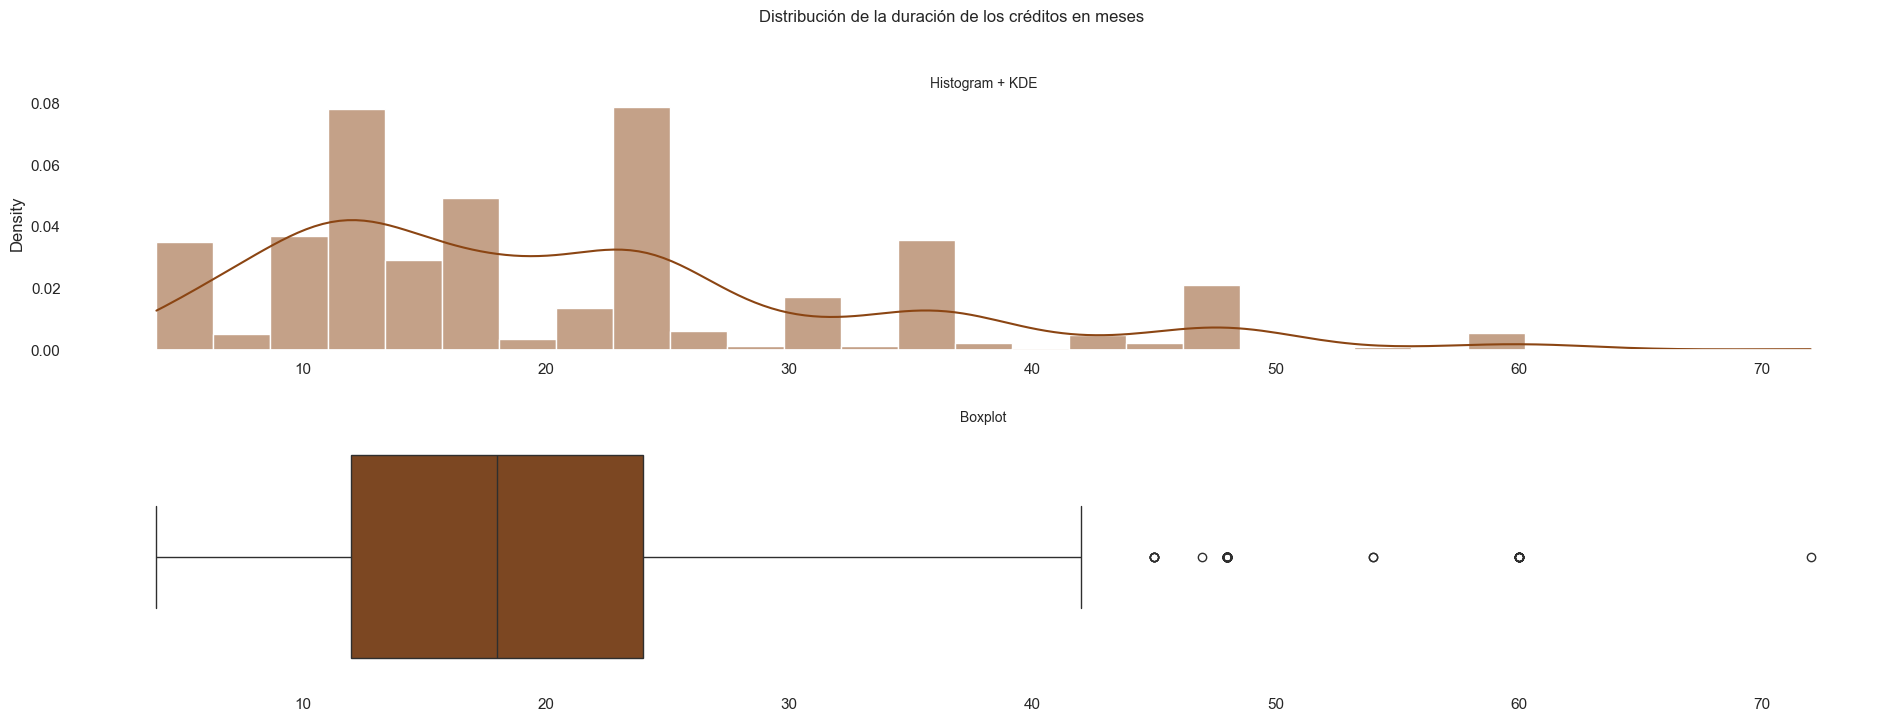

In [21]:
df_r_c = df_n.copy()
double_plot(df_r_c['mes'],'Distribución de la duración de los créditos en meses',custom_colors[0])

* `Monto de crédito`

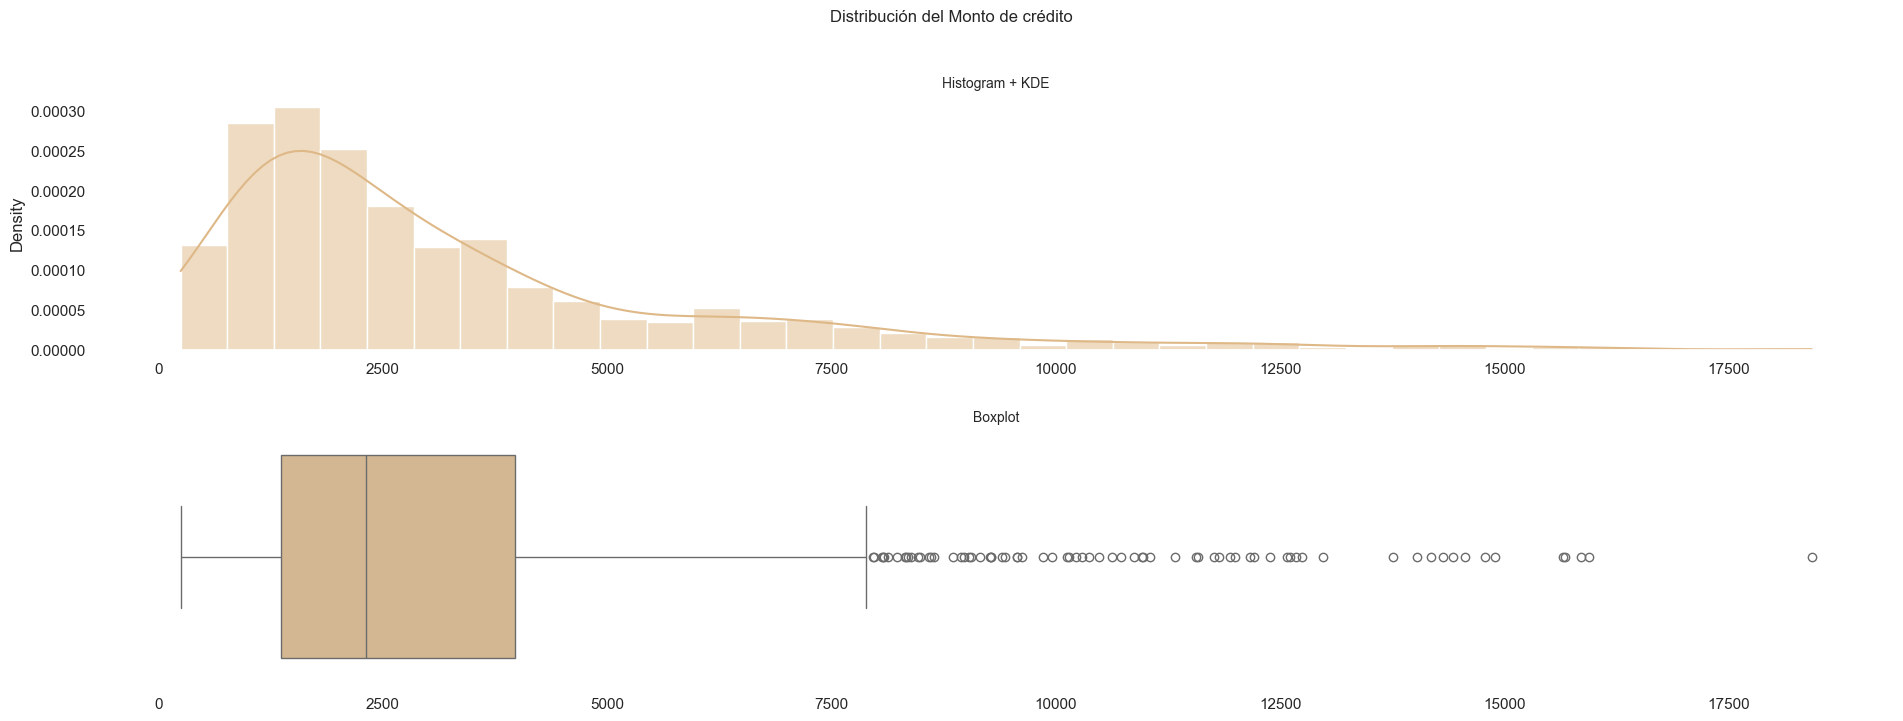

In [22]:
df_r_c = df_n.copy()
double_plot(df_r_c['monto'],'Distribución del Monto de crédito',custom_colors[1])

* `Tasa de pago a plazos en porcentaje del ingreso disponible`

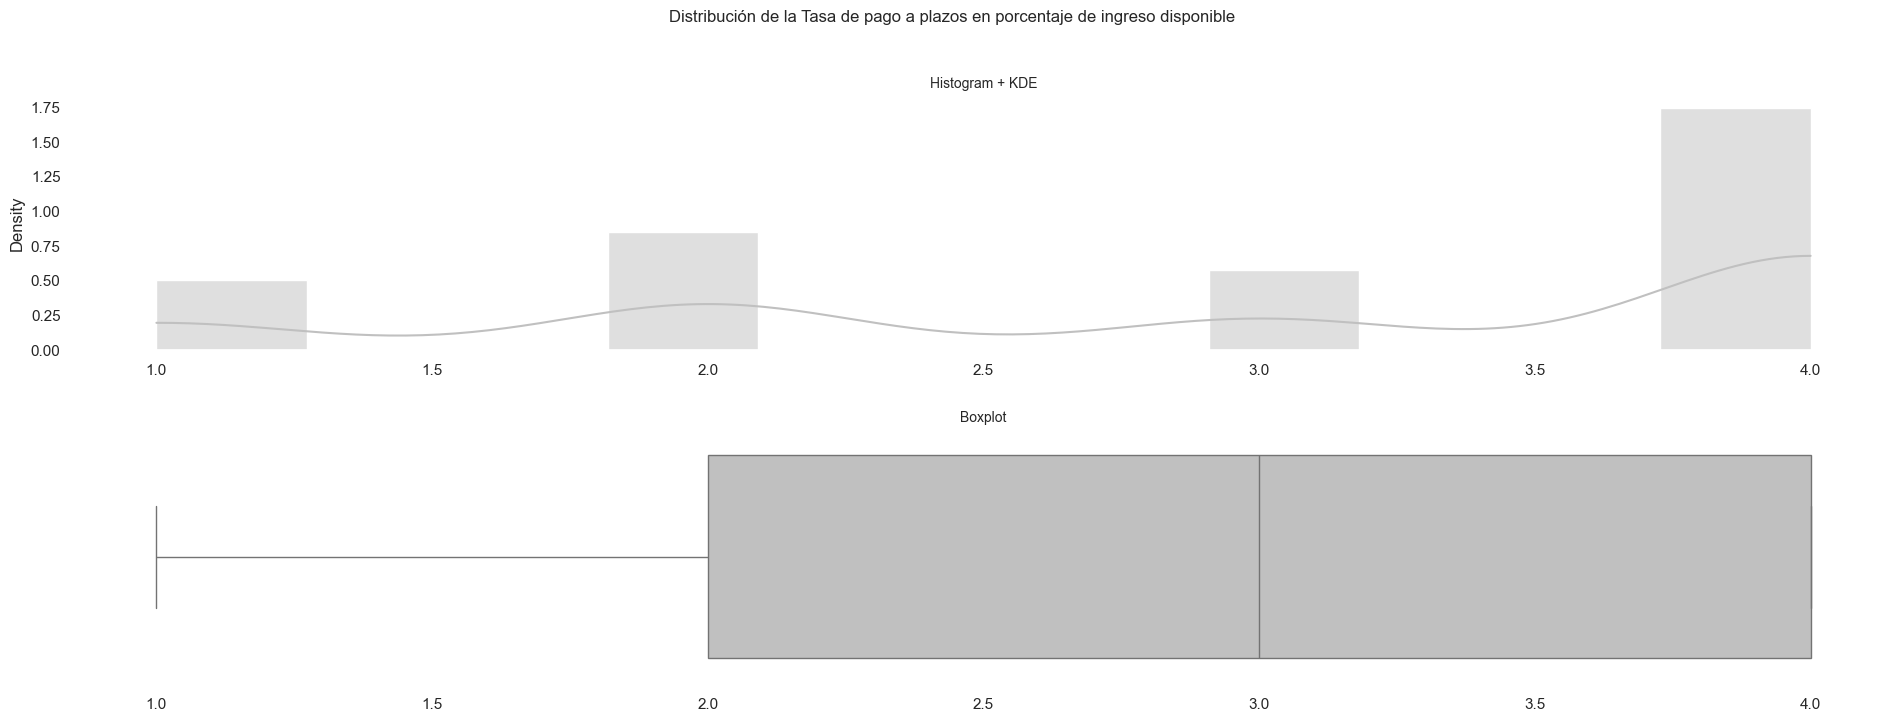

In [23]:
df_r_c = df_n.copy()
double_plot(df_r_c['tasa_pago'],'Distribución de la Tasa de pago a plazos en porcentaje de ingreso disponible',custom_colors[3])

* `Residencia actual desde`: 

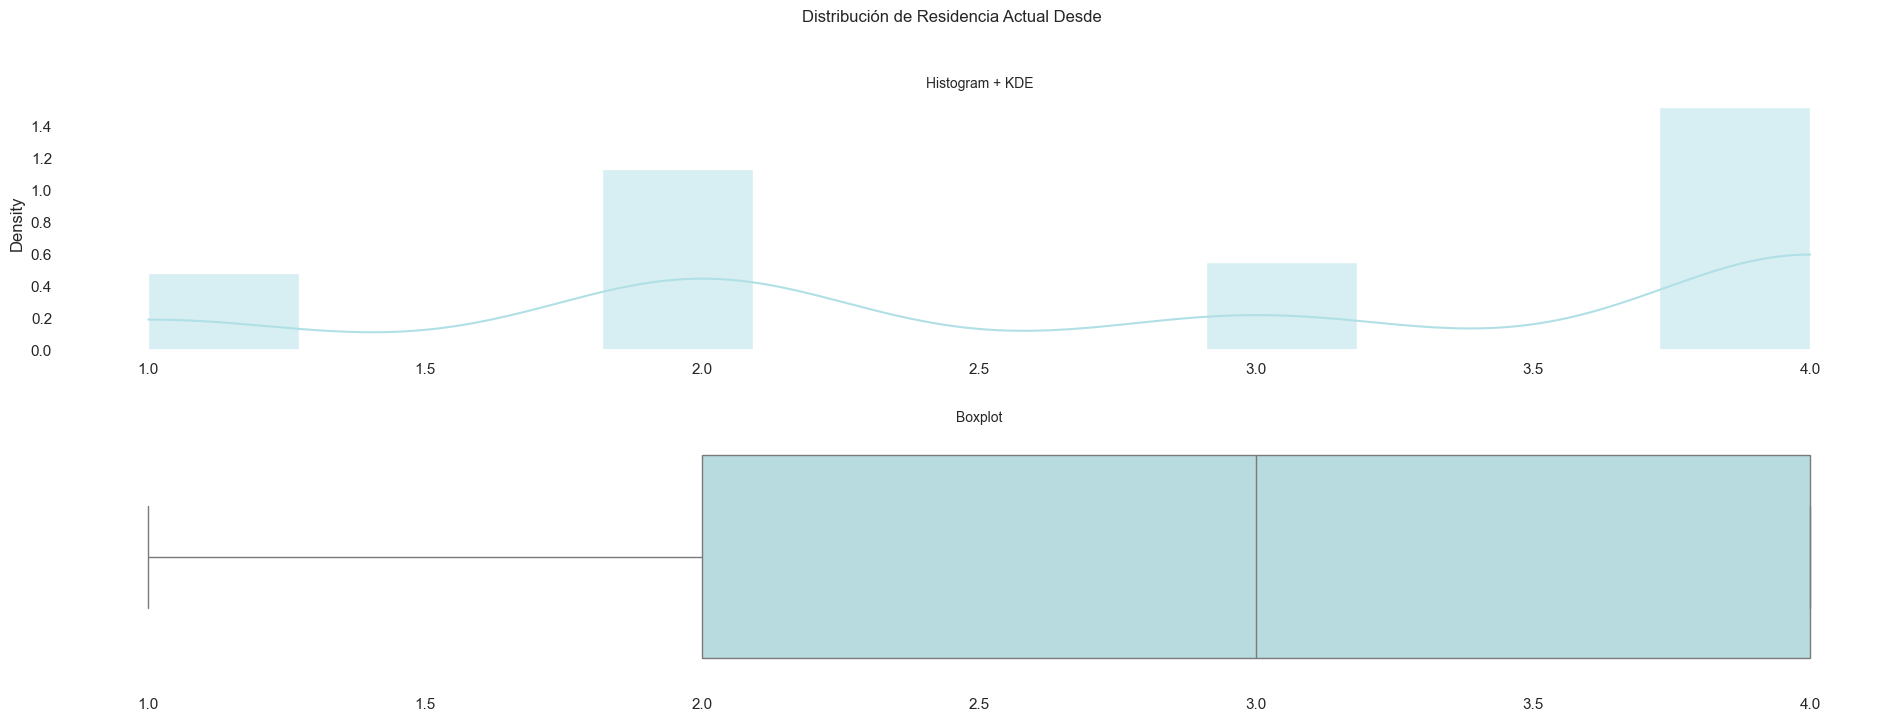

In [24]:
df_r_c = df_n.copy()
double_plot(df_r_c['residencia_desde'],'Distribución de Residencia Actual Desde',custom_colors[4])

* `Edad`

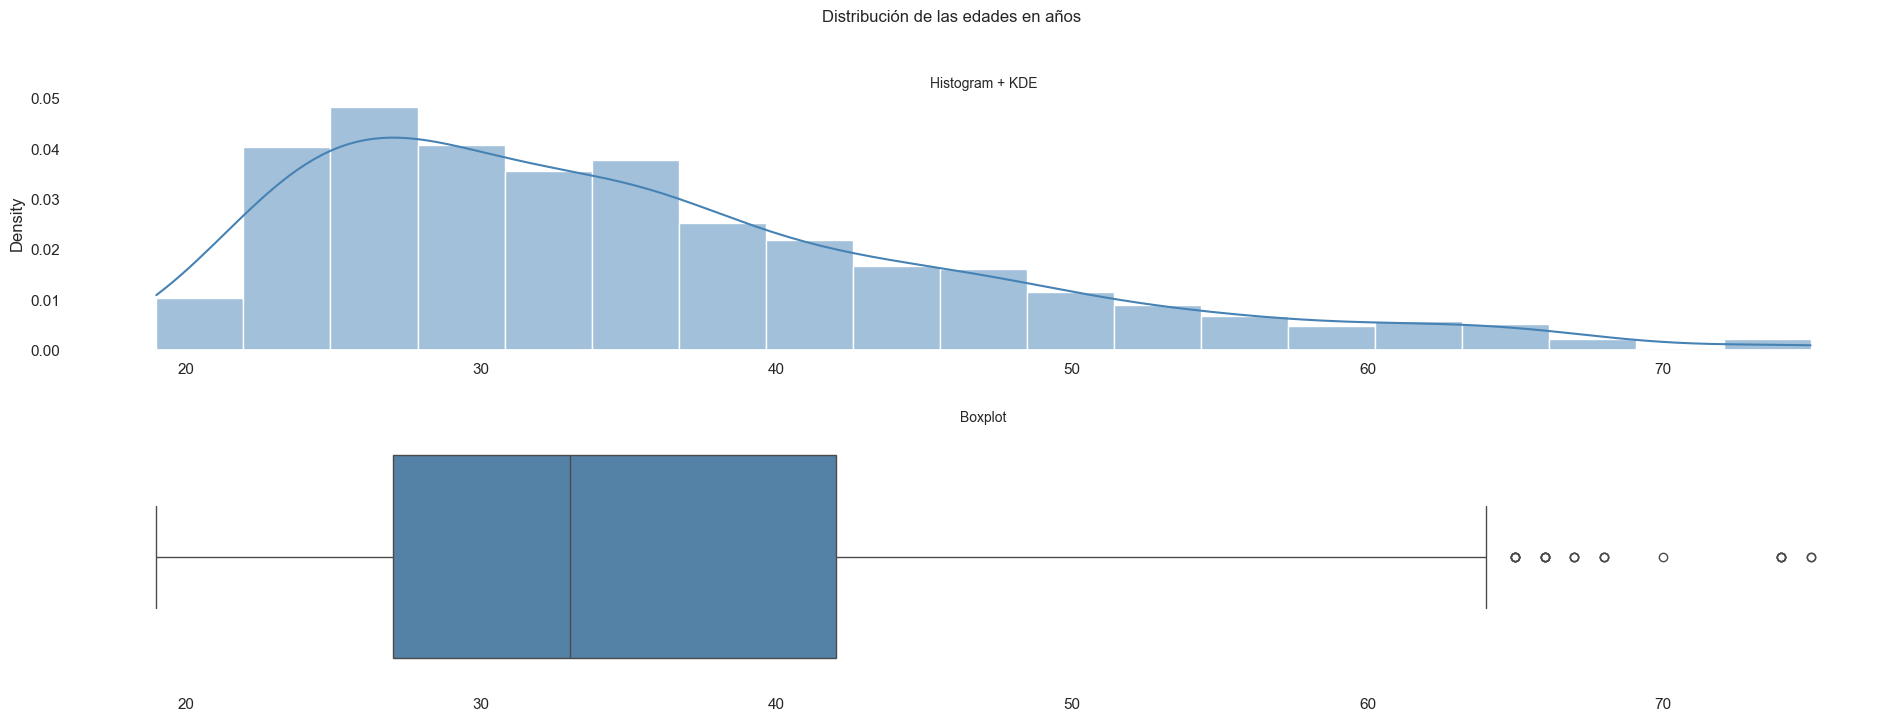

In [25]:
df_r_c = df_n.copy()
double_plot(df_r_c['edad'],'Distribución de las edades en años',custom_colors[5])

* `Número de créditos existentes con este banco` 

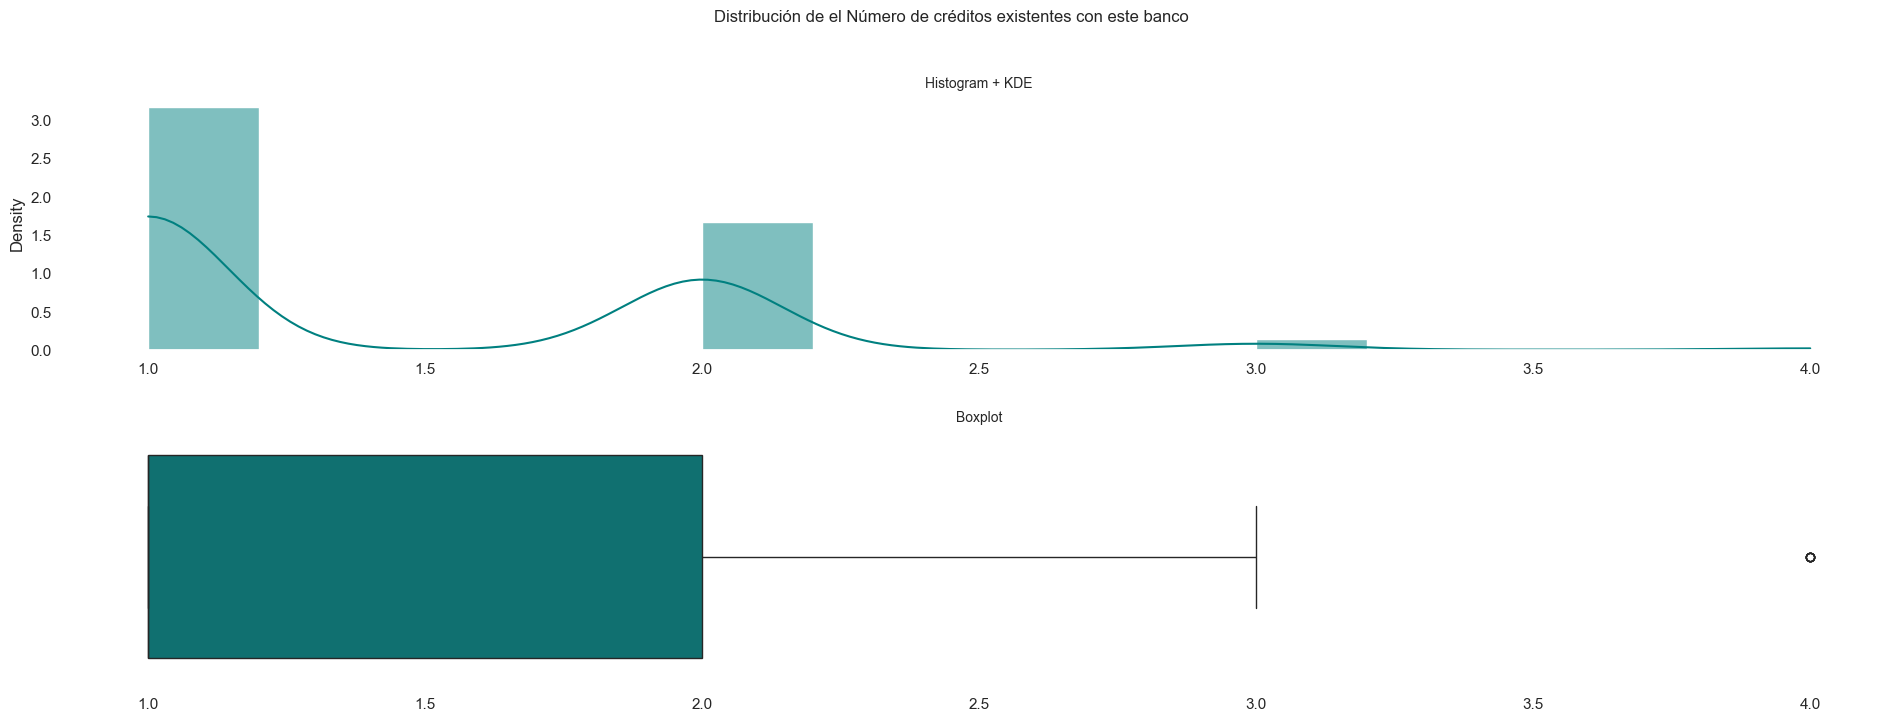

In [26]:
df_r_c = df_n.copy()
double_plot(df_r_c['creditos_activos'],'Distribución de el Número de créditos existentes con este banco',custom_colors[6])

* `Número de personas a cargo`

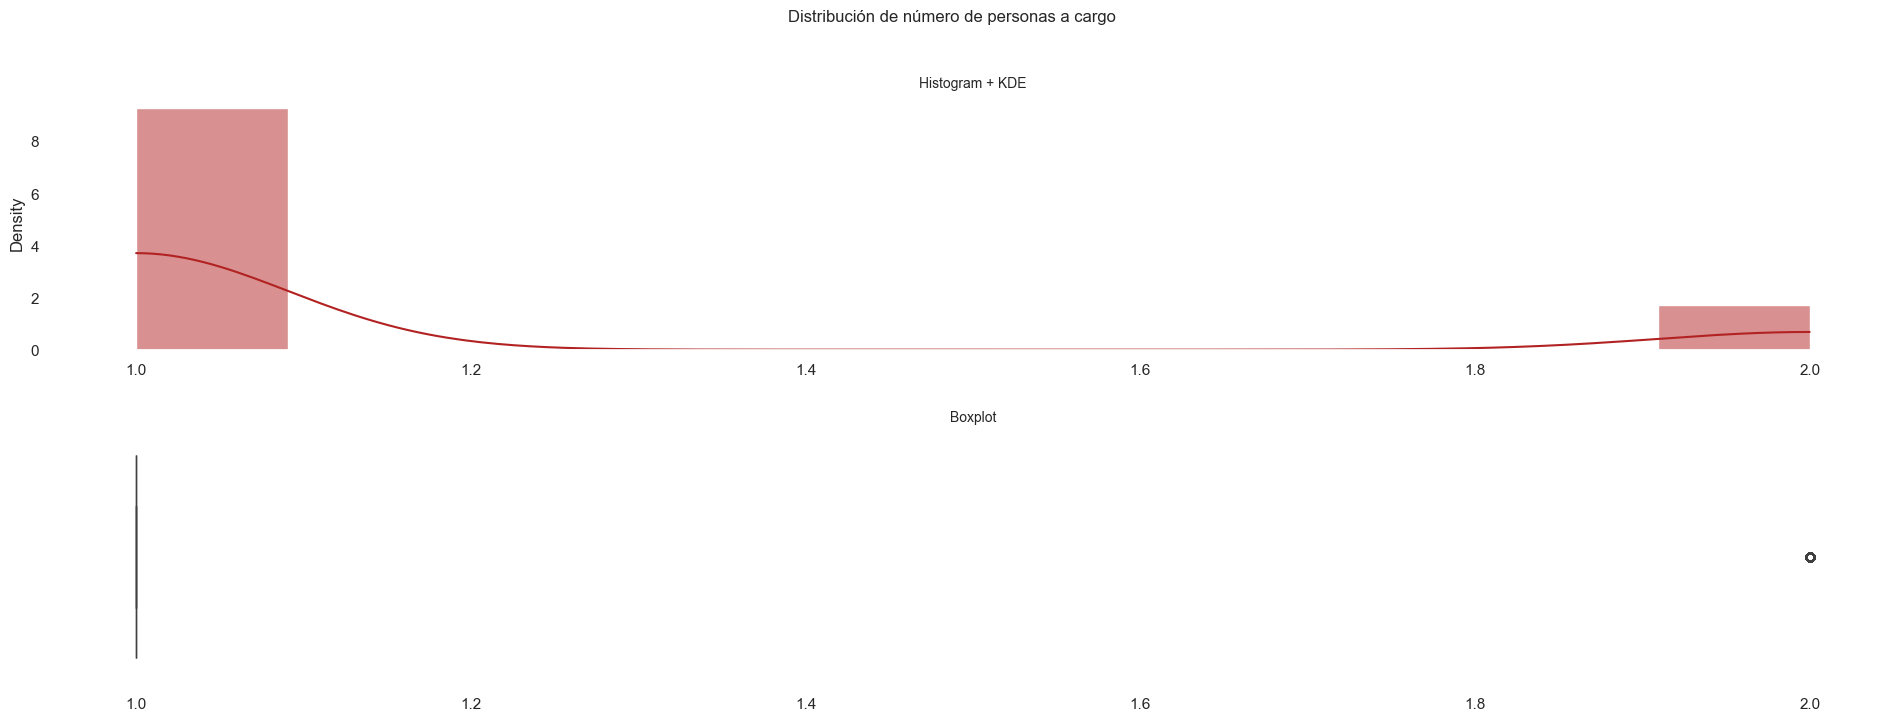

In [27]:
df_r_c = df_n.copy()
double_plot(df_r_c['personas_a_cargo'],'Distribución de número de personas a cargo',custom_colors[7])

De forma conjunta se pueden visualizar la distribución de cada una de nuestras variables númericas a través del siguiente `gráfico de violín`. 


[Text(0.5, 0, ''), Text(0, 0.5, 'Residente desde (en meses)')]

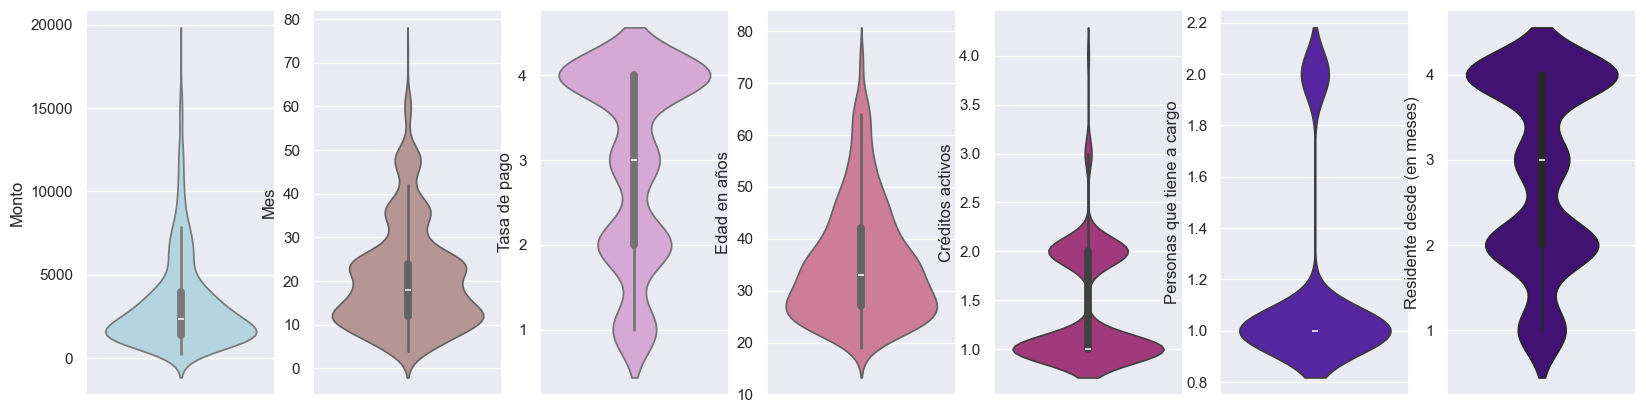

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df_r.copy()
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))

sns.violinplot(data = df_copy, y= 'monto', ax=axes[0], color='lightblue')
axes[0].set(xlabel=None, ylabel= 'Monto')
sns.violinplot(data = df_copy, y= 'mes', ax=axes[1], color='#BC8F8F')
axes[1].set(xlabel=None, ylabel= 'Mes')
sns.violinplot(data = df_copy, y= 'tasa_pago', ax=axes[2], color='#DDA0DD')
axes[2].set(xlabel=None, ylabel= 'Tasa de pago')
sns.violinplot(data = df_copy, y= 'edad', ax=axes[3], color='#DB7093')
axes[3].set(xlabel=None, ylabel= 'Edad en años')
sns.violinplot(data = df_copy, y= 'creditos_activos', ax=axes[4], color='#B32781')
axes[4].set(xlabel=None, ylabel= 'Créditos activos')
sns.violinplot(data = df_copy, y= 'personas_a_cargo', ax=axes[5], color='#5012B3')
axes[5].set(xlabel=None, ylabel= 'Personas que tiene a cargo')
sns.violinplot(data = df_copy, y= 'residencia_desde', ax=axes[6], color='#410085')
axes[6].set(xlabel=None, ylabel= 'Residente desde (en meses)')

#### Variables Categóricas 

A continuación, se presenta la distribución de cada una de las variables de nuestro conjunto de datos. 

[Text(0, 0.5, ''), Text(0.5, 0, 'Classificación')]

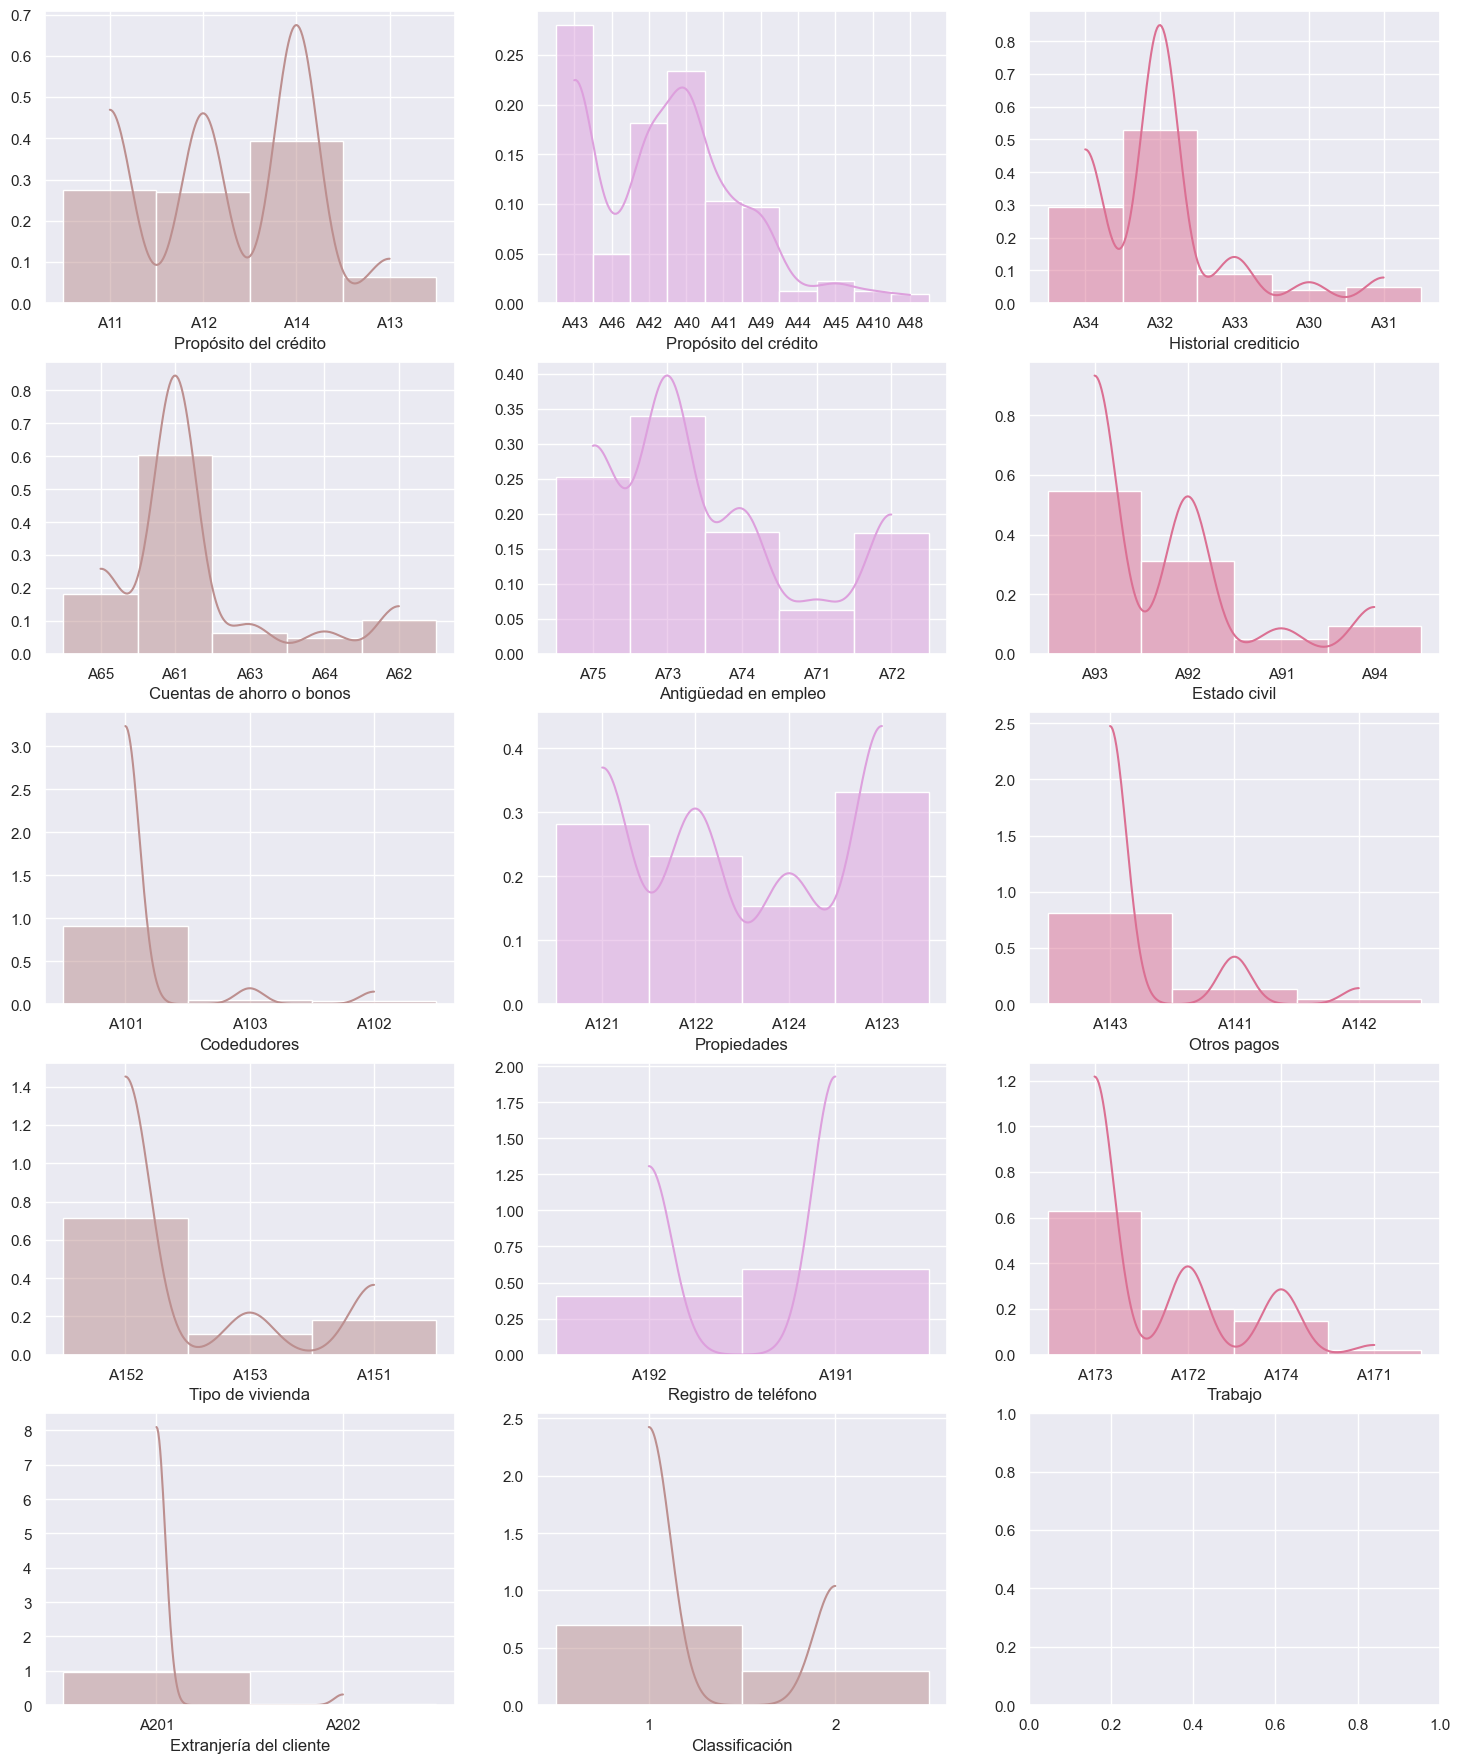

In [29]:
df_copy1 = df_r.copy()
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))

sns.histplot(x = df_copy1['estado_cuentas_exis'], kde= True, ax = axes[0,0],  color = '#BC8F8F', stat = 'density')
axes[0,0].set(ylabel = None, xlabel = 'Propósito del crédito')

sns.histplot(x = df_copy1['proposito'], kde= True, ax = axes[0,1],  color = '#DDA0DD', stat = 'density')
axes[0,1].set(ylabel = None, xlabel = 'Propósito del crédito')

sns.histplot(x = df_copy1['h_crediticia'], kde= True, ax = axes[0,2],  color = '#DB7093', stat = 'density')
axes[0,2].set(ylabel = None, xlabel = 'Historial crediticio')

#fila 2
sns.histplot(x = df_copy1['c_ahorro_bono'], kde= True, ax = axes[1,0],  color = '#BC8F8F', stat = 'density')
axes[1,0].set(ylabel = None, xlabel = 'Cuentas de ahorro o bonos')

sns.histplot(x = df_copy1['empleado_desde'], kde= True, ax = axes[1,1],  color = '#DDA0DD', stat = 'density')
axes[1,1].set(ylabel = None, xlabel = 'Antigüedad en empleo')

sns.histplot(x = df_copy1['ecivil_genero'], kde= True, ax = axes[1,2],  color = '#DB7093', stat = 'density')
axes[1,2].set(ylabel = None, xlabel = 'Estado civil')

#fila 3
sns.histplot(x = df_copy1['codeudores'], kde= True, ax = axes[2,0],  color = '#BC8F8F', stat = 'density')
axes[2,0].set(ylabel = None, xlabel = 'Codedudores')

sns.histplot(x = df_copy1['propiedades'], kde= True, ax = axes[2,1],  color = '#DDA0DD', stat = 'density')
axes[2,1].set(ylabel = None, xlabel = 'Propiedades')

sns.histplot(x = df_copy1['otros_pagos'], kde= True, ax = axes[2,2],  color = '#DB7093', stat = 'density')
axes[2,2].set(ylabel = None, xlabel = 'Otros pagos')

#fila 4
sns.histplot(x = df_copy1['tipo_vivienda'], kde= True, ax = axes[3,0],  color = '#BC8F8F', stat = 'density')
axes[3,0].set(ylabel = None, xlabel = 'Tipo de vivienda')

sns.histplot(x = df_copy1['tiene_telefono'], kde= True, ax = axes[3,1],  color = '#DDA0DD', stat = 'density')
axes[3,1].set(ylabel = None, xlabel = 'Registro de teléfono')

sns.histplot(x = df_copy1['trabajo'], kde= True, ax = axes[3,2],  color = '#DB7093', stat = 'density')
axes[3,2].set(ylabel = None, xlabel = 'Trabajo')

#fila 5
sns.histplot(x = df_copy1['extranjero'], kde= True, ax = axes[4,0],  color = '#BC8F8F', stat = 'density')
axes[4,0].set(ylabel = None, xlabel = 'Extranjería del cliente')

sns.histplot(x = df_copy1['clasificacion'], kde= True, ax = axes[4,1],  color = '#BC8F8F', stat = 'density')
axes[4,1].set(ylabel = None, xlabel = 'Classificación')

### Análsis de Correlación

A continuación se presenta análisis de `correlación` entre variables para evaluar `la relación lineal` entre pares de variables dentro del conjunto de datos a través de gráfico de dispersión.

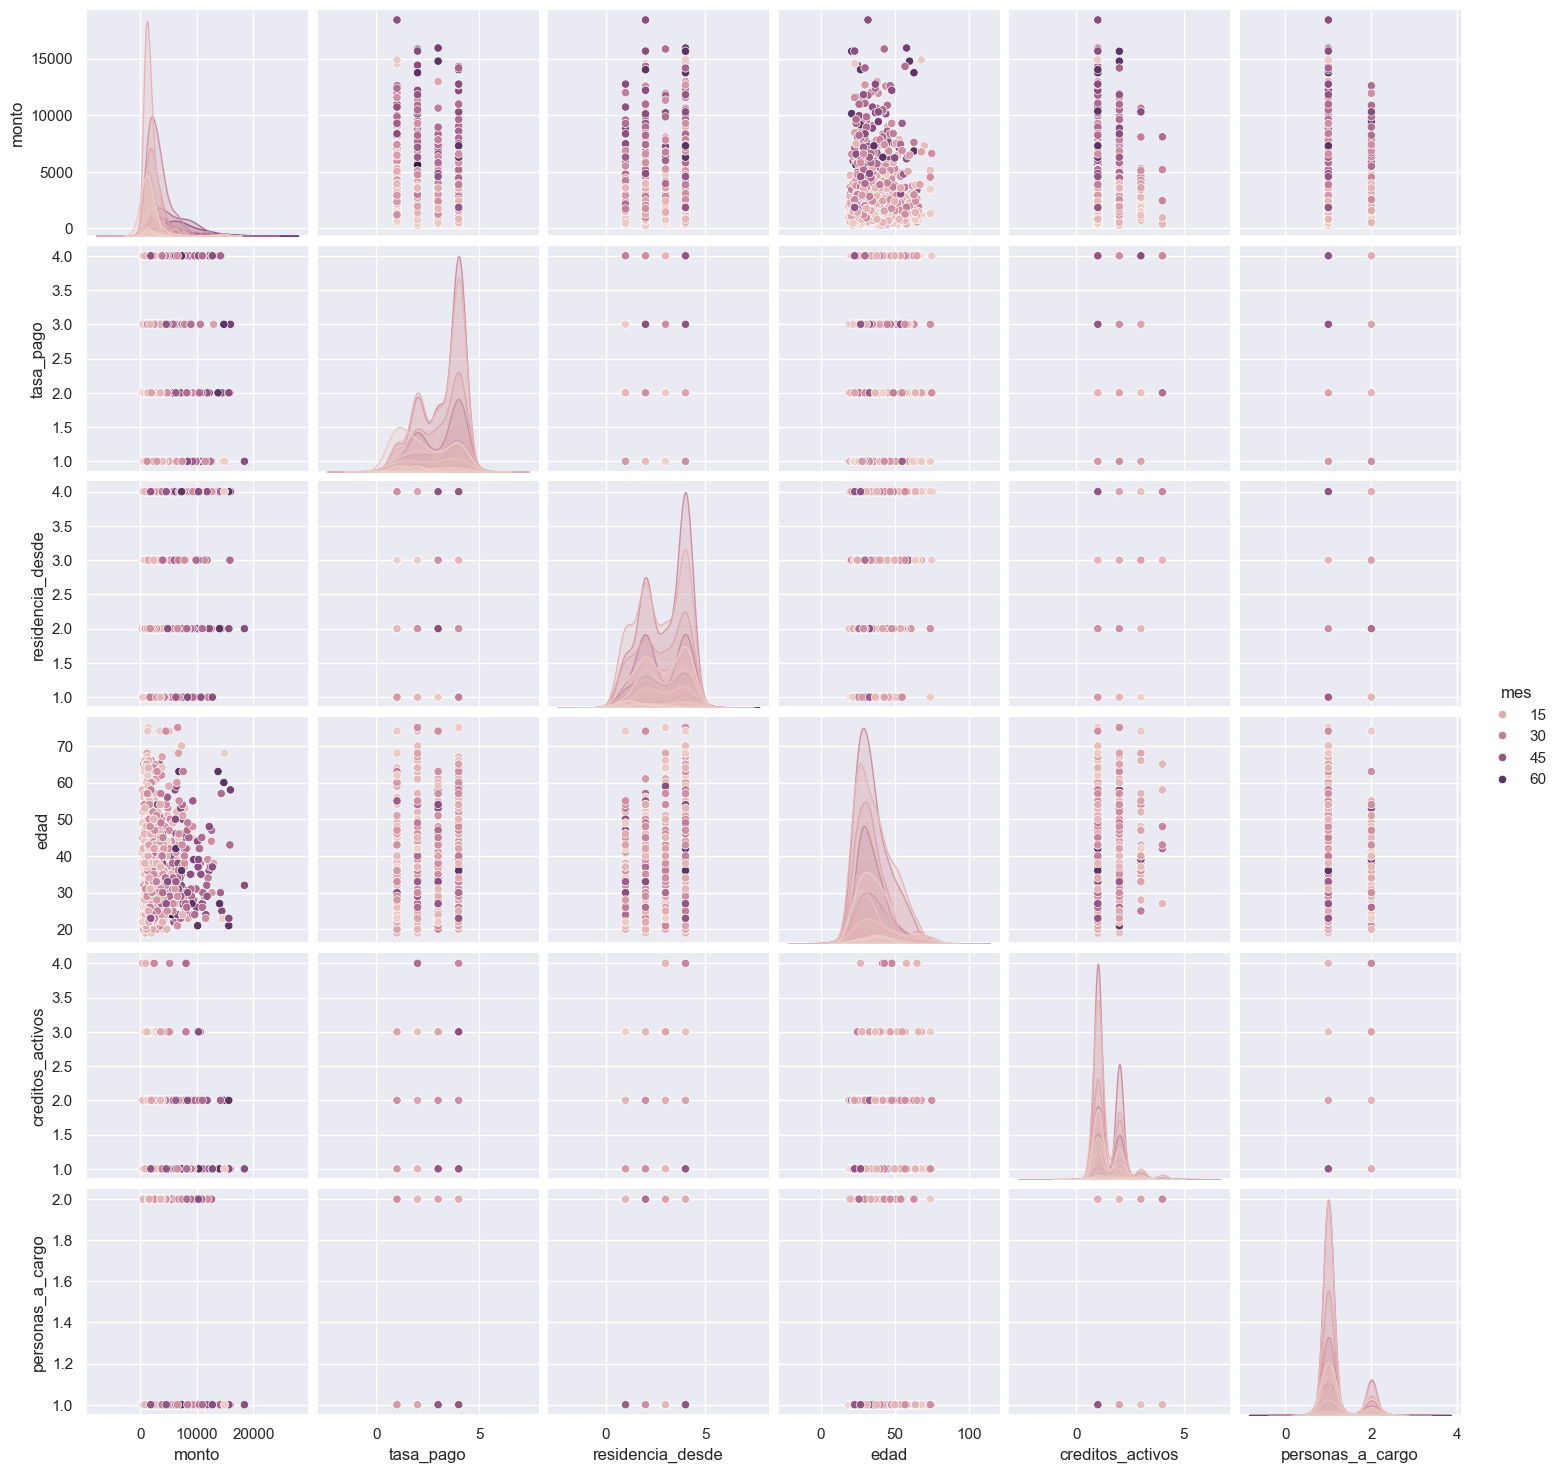

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_r_c = df_n.copy()

sns.pairplot(df_r_c, hue = "mes" )
plt.show()

Análisis de `correlación` a través de `mapa de calor`.

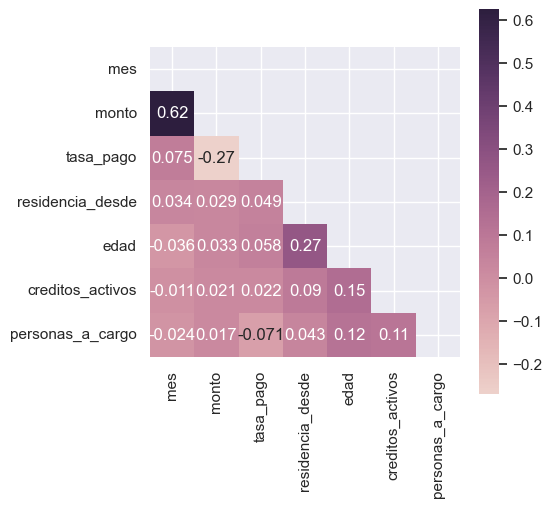

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_r_c = df_n.copy()

plt.figure(figsize=(5,5))
corr=df_r_c[:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), mask=mask, square = True, annot = True)
plt.show()


* Análisis de asociación: Tablas cruzadas. 

In [32]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['estado_cuentas_exis'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['estado_cuentas_exis'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Estado de cuentas de cheque existentes y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Estado de cuentas de cheque existentes y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Estado de cuentas de cheque existentes y clasificacion:
clasificacion          1    2   All
estado_cuentas_exis                
A11                  139  135   274
A12                  164  105   269
A13                   49   14    63
A14                  348   46   394
All                  700  300  1000

Tabla de Proporción entre Estado de cuentas de cheque existentes y clasificacion:
clasificacion               1         2
estado_cuentas_exis                    
A11                  0.507299  0.492701
A12                  0.609665  0.390335
A13                  0.777778  0.222222
A14                  0.883249  0.116751


In [33]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['proposito'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['proposito'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Proposito y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Proposito y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Proposito y clasificacion:
clasificacion    1    2   All
proposito                    
A40            145   89   234
A41             86   17   103
A410             7    5    12
A42            123   58   181
A43            218   62   280
A44              8    4    12
A45             14    8    22
A46             28   22    50
A48              8    1     9
A49             63   34    97
All            700  300  1000

Tabla de Proporción entre Proposito y clasificacion:
clasificacion         1         2
proposito                        
A40            0.619658  0.380342
A41            0.834951  0.165049
A410           0.583333  0.416667
A42            0.679558  0.320442
A43            0.778571  0.221429
A44            0.666667  0.333333
A45            0.636364  0.363636
A46            0.560000  0.440000
A48            0.888889  0.111111
A49            0.649485  0.350515


In [34]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['h_crediticia'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['h_crediticia'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Historia Crediticia y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Historia Crediticia y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Historia Crediticia y clasificacion:
clasificacion    1    2   All
h_crediticia                 
A30             15   25    40
A31             21   28    49
A32            361  169   530
A33             60   28    88
A34            243   50   293
All            700  300  1000

Tabla de Proporción entre Historia Crediticia y clasificacion:
clasificacion         1         2
h_crediticia                     
A30            0.375000  0.625000
A31            0.428571  0.571429
A32            0.681132  0.318868
A33            0.681818  0.318182
A34            0.829352  0.170648


In [35]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['c_ahorro_bono'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['c_ahorro_bono'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Cuentas de Ahorro/Bono y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Cuentas de Ahorro/Bono y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Cuentas de Ahorro/Bono y clasificacion:
clasificacion    1    2   All
c_ahorro_bono                
A61            386  217   603
A62             69   34   103
A63             52   11    63
A64             42    6    48
A65            151   32   183
All            700  300  1000

Tabla de Proporción entre Cuentas de Ahorro/Bono y clasificacion:
clasificacion         1         2
c_ahorro_bono                    
A61            0.640133  0.359867
A62            0.669903  0.330097
A63            0.825397  0.174603
A64            0.875000  0.125000
A65            0.825137  0.174863


In [36]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['empleado_desde'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['empleado_desde'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Empleado desde y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Empleado desde y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Empleado desde y clasificacion:
clasificacion     1    2   All
empleado_desde                
A71              39   23    62
A72             102   70   172
A73             235  104   339
A74             135   39   174
A75             189   64   253
All             700  300  1000

Tabla de Proporción entre Empleado desde y clasificacion:
clasificacion          1         2
empleado_desde                    
A71             0.629032  0.370968
A72             0.593023  0.406977
A73             0.693215  0.306785
A74             0.775862  0.224138
A75             0.747036  0.252964


In [37]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['ecivil_genero'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['ecivil_genero'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Estado Civil - Género  y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Estado Civil - Género y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Estado Civil - Género  y clasificacion:
clasificacion    1    2   All
ecivil_genero                
A91             30   20    50
A92            201  109   310
A93            402  146   548
A94             67   25    92
All            700  300  1000

Tabla de Proporción entre Estado Civil - Género y clasificacion:
clasificacion         1         2
ecivil_genero                    
A91            0.600000  0.400000
A92            0.648387  0.351613
A93            0.733577  0.266423
A94            0.728261  0.271739


In [38]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['codeudores'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['codeudores'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Otros Deudores - Garantes y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Otros Deudores - Garantes y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Otros Deudores - Garantes y clasificacion:
clasificacion    1    2   All
codeudores                   
A101           635  272   907
A102            23   18    41
A103            42   10    52
All            700  300  1000

Tabla de Proporción entre Otros Deudores - Garantes y clasificacion:
clasificacion         1         2
codeudores                       
A101           0.700110  0.299890
A102           0.560976  0.439024
A103           0.807692  0.192308


In [39]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['propiedades'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['propiedades'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Propiedad y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Propiedad y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Propiedad y clasificacion:
clasificacion    1    2   All
propiedades                  
A121           222   60   282
A122           161   71   232
A123           230  102   332
A124            87   67   154
All            700  300  1000

Tabla de Proporción entre Propiedad y clasificacion:
clasificacion         1         2
propiedades                      
A121           0.787234  0.212766
A122           0.693966  0.306034
A123           0.692771  0.307229
A124           0.564935  0.435065


In [40]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['otros_pagos'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['otros_pagos'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Otros Planes de pago y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Otros Planes de pago  y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Otros Planes de pago y clasificacion:
clasificacion    1    2   All
otros_pagos                  
A141            82   57   139
A142            28   19    47
A143           590  224   814
All            700  300  1000

Tabla de Proporción entre Otros Planes de pago  y clasificacion:
clasificacion         1         2
otros_pagos                      
A141           0.589928  0.410072
A142           0.595745  0.404255
A143           0.724816  0.275184


In [41]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['tipo_vivienda'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['tipo_vivienda'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Tipo de vivienda y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Tipo de vivienda y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Tipo de vivienda y clasificacion:
clasificacion    1    2   All
tipo_vivienda                
A151           109   70   179
A152           527  186   713
A153            64   44   108
All            700  300  1000

Tabla de Proporción entre Tipo de vivienda y clasificacion:
clasificacion         1         2
tipo_vivienda                    
A151           0.608939  0.391061
A152           0.739130  0.260870
A153           0.592593  0.407407


In [42]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['tiene_telefono'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['tiene_telefono'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Teléfono y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Historia Teléfono y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Teléfono y clasificacion:
clasificacion     1    2   All
tiene_telefono                
A191            409  187   596
A192            291  113   404
All             700  300  1000

Tabla de Proporción entre Historia Teléfono y clasificacion:
clasificacion          1         2
tiene_telefono                    
A191            0.686242  0.313758
A192            0.720297  0.279703


In [43]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['trabajo'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['trabajo'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Trabajo y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Trabajo y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Trabajo y clasificacion:
clasificacion    1    2   All
trabajo                      
A171            15    7    22
A172           144   56   200
A173           444  186   630
A174            97   51   148
All            700  300  1000

Tabla de Proporción entre Trabajo y clasificacion:
clasificacion         1         2
trabajo                          
A171           0.681818  0.318182
A172           0.720000  0.280000
A173           0.704762  0.295238
A174           0.655405  0.344595


In [44]:
df_c= df_r[[ "estado_cuentas_exis", "proposito", "h_crediticia", "c_ahorro_bono", "empleado_desde", 
      "ecivil_genero", "codeudores", "propiedades", "otros_pagos", "tipo_vivienda", "tiene_telefono", "trabajo", 
      "extranjero", "clasificacion"]]


# Calcular tabla de frecuencias cruzadas con margen (margen en variable1)
tabla_cruzada_2 = pd.crosstab(df_c['extranjero'], df_c['clasificacion'], margins=True)

# Calcular tabla de frecuencias cruzadas con porcentajes por fila
tabla_cruzada_3 = pd.crosstab(df_c['extranjero'], df_c['clasificacion'], normalize='index')

print("\nTabla de Frecuencias Cruzadas entre Sí es recidente extranjero y clasificacion:")
print(tabla_cruzada_2)
print("\nTabla de Proporción entre Sí es recidente extranjero y clasificacion:")
print(tabla_cruzada_3)


Tabla de Frecuencias Cruzadas entre Sí es recidente extranjero y clasificacion:
clasificacion    1    2   All
extranjero                   
A201           667  296   963
A202            33    4    37
All            700  300  1000

Tabla de Proporción entre Sí es recidente extranjero y clasificacion:
clasificacion         1         2
extranjero                       
A201           0.692627  0.307373
A202           0.891892  0.108108


### Conclusión

Aplicar un Análisis Exploratorio de Datos (EDA) sobre la base de datos `German Credit Risk` proporcionó una visión detallada y significativa de las características clave relacionadas con el riesgo crediticio. Durante el EDA, se examinaron minuciosamente variables como el historial crediticio, el propósito del crédito, la edad, el estado civil, el empleo y otros factores relevantes. Este proceso permitió identificar la distribución de estas variables, detectar posibles correlaciones entre ellas y comprender cómo influyen en las decisiones crediticias. Además, el EDA reveló patrones de comportamiento financiero y posibles anomalías o valores atípicos que se deben estudiar a profundidad. 